In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pingouin as pg

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype']=42
%matplotlib inline
mpl.rcParams['pdf.fonttype'] = 42 
mpl.rcParams['font.sans-serif']=['Arial', 'Helvetica','Bitstream Vera Sans', 'DejaVu Sans', 'Lucida Grande', 
                                 'Verdana', 'Geneva', 'Lucid', 'Avant Garde', 'sans-serif'] 

def set_pub_plots(pal=sns.blend_palette(["gray","crimson", 'cyan', 'magenta', 'purple' ],5)):
    sns.set_style("white")
    sns.set_palette(pal)
    sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5, "axes.linewidth":2.5}) 
    sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    # optional, makes markers bigger, too, axes.linewidth doesn't seem to work
    plt.rcParams['axes.linewidth'] = 2.5

rc_pub={'font.size': 25, 'axes.labelsize': 25, 'legend.fontsize': 25.0, 
    'axes.titlesize': 25, 'xtick.labelsize': 25, 'ytick.labelsize': 25, 
    #'axes.color_cycle':pal, # image.cmap - rewritesd the default colormap
    'axes.linewidth':2.5, 'lines.linewidth': 2.5,
    'xtick.color': 'black', 'ytick.color': 'black', 'axes.edgecolor': 'black','axes.labelcolor':'black','text.color':'black'}
# to restore the defaults, call plt.rcdefaults() 

#set_pub_bargraphs()
set_pub_plots()

%load_ext autoreload
%autoreload 2

import scipy.signal as sg
sns.set_context("poster")
sns.set_style("ticks")

C:\Users\AChub_Lab\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# STAGE 4 ANALYSIS (DELAYED GO/NO-GO) 

## LOADING FILES

In [3]:
filedir=r'U:\Data\snareddu\behavioral opto\STAGE 4'
frrwdfiles=glob.glob(filedir+'\DAY*\*.csv')
frrwdfiles

['U:\\Data\\snareddu\\behavioral opto\\STAGE 4\\DAY 1\\DESKTOP-FFGUUV8_PVCreExp2_Stage 4 Pink noise loc discrimination_oneatatimevideo_v6_short_stim_150-et338.csv',
 'U:\\Data\\snareddu\\behavioral opto\\STAGE 4\\DAY 1\\WINDOWS-PJJ0GDK_PVCreExp_Stage 4 Pink noise loc discrimination_oneatatimevideo_v6_short_stim_607-et281.csv',
 'U:\\Data\\snareddu\\behavioral opto\\STAGE 4\\DAY 1\\WINDOWS-PJJ0GDK_PVCreExp_Stage 4 Pink noise loc discrimination_oneatatimevideo_v6_short_stim_626-et277.csv',
 'U:\\Data\\snareddu\\behavioral opto\\STAGE 4\\DAY 1\\WINDOWS-RI84KQQ_PVCreExp3_Stage 4 Pink noise loc discrimination_oneatatimevideo_v6_short_stim_308-et280.csv',
 'U:\\Data\\snareddu\\behavioral opto\\STAGE 4\\DAY 1\\WINDOWS-RI84KQQ_PVCreExp3_Stage 4 Pink noise loc discrimination_oneatatimevideo_v6_short_stim_309-et279.csv',
 'U:\\Data\\snareddu\\behavioral opto\\STAGE 4\\DAY 1\\WINDOWS-RI84KQQ_PVCreExp3_Stage 4 Pink noise loc discrimination_oneatatimevideo_v6_short_stim_310-et334.csv',
 'U:\\Data\\

## CREATING DATAFRAME

In [17]:
dfls=[]
for iii,f in enumerate(frrwdfiles):
    
    if iii%50==0:
        print(f'done loading {iii} out of {len(frrwdfiles)}')
    
    infodf=pd.read_csv(f,names=['Name','Value',''],skiprows=np.arange(17,100000*2,1)) ###10000 here
    day=int(f.split('\\')[-2][3:])
    et=f.split('_')[-1].split('.')[0].split('-')[-1][-3:]
    idn=f.split('oneatatimevideo_')[-1].split('-')[-1][:-4]

    try:
        tmpdf=pd.read_csv(f,skiprows=17)
        if 'Evnt_Time' not in tmpdf.columns:
            tmpdf=pd.read_csv(f,skiprows=17,header=1)
    except:
        print(f,'not read')
        
    startcorr=tmpdf[(tmpdf.Group_ID==2)
                 &(tmpdf.Item_Name.str.contains('correction'))
                 ].Evnt_Time.values
    if 'withopto' in f:
        laseront=tmpdf[(tmpdf.Group_ID==4)
                      &(tmpdf.Item_Name=='Laser #1')
                      ].Evnt_Time.values
    dispmov1t=tmpdf[(tmpdf.Group_ID==3)
                   &(tmpdf.Evnt_Name.str.contains('Play Video'))
                   &(tmpdf.Arg2_Name=='Video 1')  
                   ].Evnt_Time.values
    dispmov2t=tmpdf[(tmpdf.Group_ID==3)
                    &(tmpdf.Evnt_Name.str.contains('Play Video'))
                    &(tmpdf.Arg2_Name=='Video 2')  
                   ].Evnt_Time.values
    dispgrayt=tmpdf[(tmpdf.Group_ID==5)
                  &(tmpdf.Item_Name.str.contains('displaygray'))
                   ].Evnt_Time.values
    
    
    mov1cortoucht=tmpdf[(tmpdf.Group_ID==6)
                        &(tmpdf.Item_Name=='loccorrecttouch')
                       ].Evnt_Time.values
    mov2notoucht=tmpdf[(tmpdf.Group_ID==6)
                        &(tmpdf.Item_Name=='loccorrnotouch')
                       ].Evnt_Time.values
    mov1notoucht=tmpdf[(tmpdf.Group_ID==6)
                        &(tmpdf.Item_Name=='locincnotouch')
                       ].Evnt_Time.values
    mov2inctoucht=tmpdf[(tmpdf.Group_ID==6)
                        &(tmpdf.Item_Name=='locinctouch')
                       ].Evnt_Time.values
    mov2notouchcorrectiont=tmpdf[(tmpdf.Group_ID==6)
                                &(tmpdf.Item_Name=='locinctouchcorrection')
                               ].Evnt_Time.values
    mov1touchcorrectiont=tmpdf[(tmpdf.Group_ID==6)
                              &(tmpdf.Item_Name=='locincnotouchcorrection')
                              ].Evnt_Time.values
    trayentryt=tmpdf[(tmpdf.Group_ID==12)
                     &(tmpdf.Evnt_Name.str.contains('On Event'))
                    ].Evnt_Time.values
  
    onesessionls=[]
    stim_time_ls=[]
    tr_ls=[]
    alldispt=sorted(np.hstack([dispmov1t,dispmov2t]))
    alldispstim=[(i in dispmov1t) for i in alldispt]
    alldispt.append(tmpdf.Evnt_Time.max())
    tr=0
    tr2=0
    for i,t0 in enumerate(alldispt[:-1]):
        CorrT=0
        t0,t1=alldispt[i],alldispt[i+1]
        if t0 in dispmov1t:
            stim=1
            tr=tr+1
            tr_ls.append(tr)
        else:
            stim=2
            tr2=tr2+1
            tr_ls.append(tr2)
        if stim==1:
   
            t_movtoucht=mov1cortoucht[(mov1cortoucht>t0)&(mov1cortoucht<t1)] 
            t_movnotoucht=mov1notoucht[(mov1notoucht>t0)&(mov1notoucht<t1)]
            t_movcorrrectiont=mov1touchcorrectiont[(mov1touchcorrectiont>t0)&(mov1touchcorrectiont<t1)]
            t_trayentryt=trayentryt[(trayentryt>t0)&(trayentryt<t1)]
            if t_movnotoucht.shape[0]:
                CorrT=1
        elif stim==2:
            t_movnotoucht=mov2notoucht[(mov2notoucht>t0)&(mov2notoucht<t1)]
            t_movtoucht=mov2inctoucht[(mov2inctoucht>t0)&(mov2inctoucht<t1)]
            t_movcorrrectiont=mov2notouchcorrectiont[(mov2notouchcorrectiont>t0)&(mov2notouchcorrectiont<t1)]
 
        if t_movcorrrectiont.shape[0]:
            CorrT=1
        if i>=1:
            start_corr_t=startcorr[(startcorr<t0)&(startcorr>alldispt[i-1])]
        if t_movtoucht.shape[0] or t_movcorrrectiont.shape[0]:
            disp2touch=min(np.hstack([t_movtoucht,t_movcorrrectiont])-t0)
            if stim==1 and t_movcorrrectiont.shape[0]>0:
                disp2touch=np.nan
            if stim==1 and len(t_trayentryt):
                touch2entry=min(t_trayentryt-t_movtoucht)
            else:
                touch2entry=np.nan
        else:
            disp2touch=np.nan
            touch2entry=np.nan
        if t_movnotoucht.shape[0]:
            disp2touch=np.nan
            touch2entry=np.nan
        if 'withopto' in f:
            laseron=laseront[abs(laseront-t0)<5+0.5]
            onesessionls.append((i,t0,stim,disp2touch,touch2entry,len(laseron),CorrT))
            stim_time_ls.append(t0)
        else:
            onesessionls.append((i,t0,stim,disp2touch,touch2entry,np.nan,CorrT))
            stim_time_ls.append(t0)
    x=np.array(stim_time_ls[1:])-np.array(stim_time_ls[:-1])
    iti = np.concatenate([x,np.array([0])])
    
    onesessiondf=pd.DataFrame(onesessionls,columns=['trial','stim_time','stim','disp2touch','touch2entry','laser','CorrT'])
    onesessiondf['stim_time']=onesessiondf['stim_time']-onesessiondf.stim_time.values[0]
    onesessiondf['et']=et
    onesessiondf['day']=day
    onesessiondf['idn']=idn
    onesessiondf['iti']=iti
    onesessiondf['tr_uq']=tr_ls
    dfls.append(onesessiondf)
allsessiondf=pd.concat(dfls)
allsessiondf['uid']=allsessiondf['idn']+'_'+allsessiondf['trial'].astype(str)
allsessiondf.head(10)


done loading 0 out of 216
done loading 50 out of 216
done loading 100 out of 216
done loading 150 out of 216
done loading 200 out of 216


,trial,stim_time,stim,disp2touch,touch2entry,laser,CorrT,et,day,idn,iti,tr_uq,uid
0,0,0.000,1,NaN,NaN,NaN,1,338,1,et338,16.503,1,et338_0
1,1,16.503,1,2.959,12.095,NaN,0,338,1,et338,28.416,2,et338_1
2,2,44.919,1,NaN,NaN,NaN,1,338,1,et338,16.503,3,et338_2
3,3,61.422,1,1.787,8.110,NaN,0,338,1,et338,24.044,4,et338_3
4,4,85.466,2,NaN,NaN,NaN,0,338,1,et338,11.200,1,et338_4
5,5,96.666,1,NaN,NaN,NaN,1,338,1,et338,16.962,5,et338_5
6,6,113.628,1,NaN,NaN,NaN,1,338,1,et338,7.242,6,et338_6
7,7,120.870,1,4.994,2.924,NaN,0,338,1,et338,21.268,7,et338_7
8,8,142.138,2,2.040,NaN,NaN,0,338,1,et338,22.722,2,et338_8
9,9,164.860,2,NaN,NaN,NaN,0,338,1,et338,11.499,3,et338_9


### CREATING DATAFRAME FOR PERCENTAGE OF TOUCHES


In [18]:
report_directory=r'U:\Data\Violet\Optio IA32 fall 2023\Report/'
tmp_foo=allsessiondf[allsessiondf.tr_uq<21] ##Using only first 20 trials of each condition
# tmp_foo=allsessiondf  ### Using all trials
perc_correct=tmp_foo[(tmp_foo.stim.isin([1,2,3]))
                         ].groupby(['et','stim','day']
                                  ).apply(lambda x:x[(x.CorrT==0)&(x.trial.isin(x.trial.unique()[:]))
                                                    ].disp2touch.shape[0]/x[x.trial.isin(x.trial.unique()[:])
                                                                          ].disp2touch.shape[0]
                                             ).to_frame('perc_correct').reset_index()


### adding perc_touches to df
ls1=[]
for a,b, in perc_correct.groupby(['et','stim','day']):
    if a[1]!=1:
        ls=b.apply(lambda x:1-x.perc_correct,axis=1)
    else:
        ls=b.apply(lambda x:x.perc_correct,axis=1)
    ls1.append(ls)        
            
ls_ar=np.array(ls1)
perc_correct['perc_tch']=ls_ar

### PLOTTING PERCENTAGE TOUCHES FOR EACH CONDITION

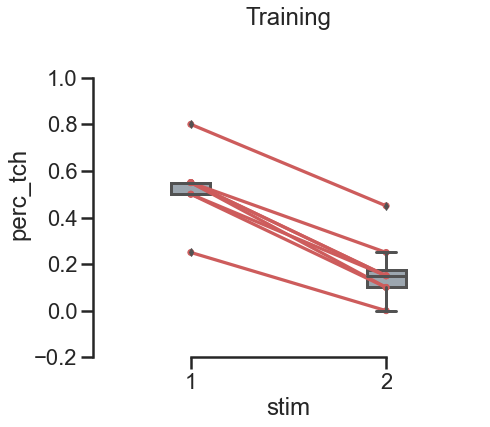

In [20]:
report_directory=r'U:\Data\snareddu\behavioral opto\Report/'
# tmp1=perc_correct.groupby(['et','stim']
#                         ).apply(lambda x: x.loc[x['day'].idxmax()][['day','perc_tch']]).reset_index()
tmp1=perc_correct[perc_correct.day==25] ### For selecting final day of training

fig,ax=plt.subplots(1,1,sharey=True,figsize=(7,6))
pg.plot_paired(tmp1, dv='perc_tch', within='stim', subject='et',ax=ax)




ax.set_ylim(-0.2,1.2)
ax.set_title('Training')
ax.set_yticks(np.arange(-0.2,1.2,0.2))

sns.despine(trim=True, ax=ax)



# plt.savefig(report_directory +'_opto_testday_paired_plot_together_within_laser_20tr.pdf',bbox_inches='tight')
# plt.savefig(report_directory +'_opto_testday_paired_plot_together_within_laser_20tr.png',bbox_inches='tight')

In [21]:
### Wilcoxon signed rank test 

scipy.stats.wilcoxon(tmp1[(tmp1.stim==1)].perc_tch.values, 
                     tmp1[(tmp1.stim==2)].perc_tch.values, zero_method='wilcox', 
                     correction=False, alternative='two-sided', method='auto', axis=0, nan_policy='propagate',
                     keepdims=False)


WilcoxonResult(statistic=0.0, pvalue=0.0078125)